## Chapter 1.2: Graph properties

In [1]:
import networkx as nx
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import os
import sys

sys.path.append(f"{os.getcwd()}/..")

from utils import draw_graph, draw_enhanced_path

### Shortest path

In [2]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [3]:
path = nx.shortest_path(G,source=1,target=7)
print(path)

[1, 3, 4, 5, 7]


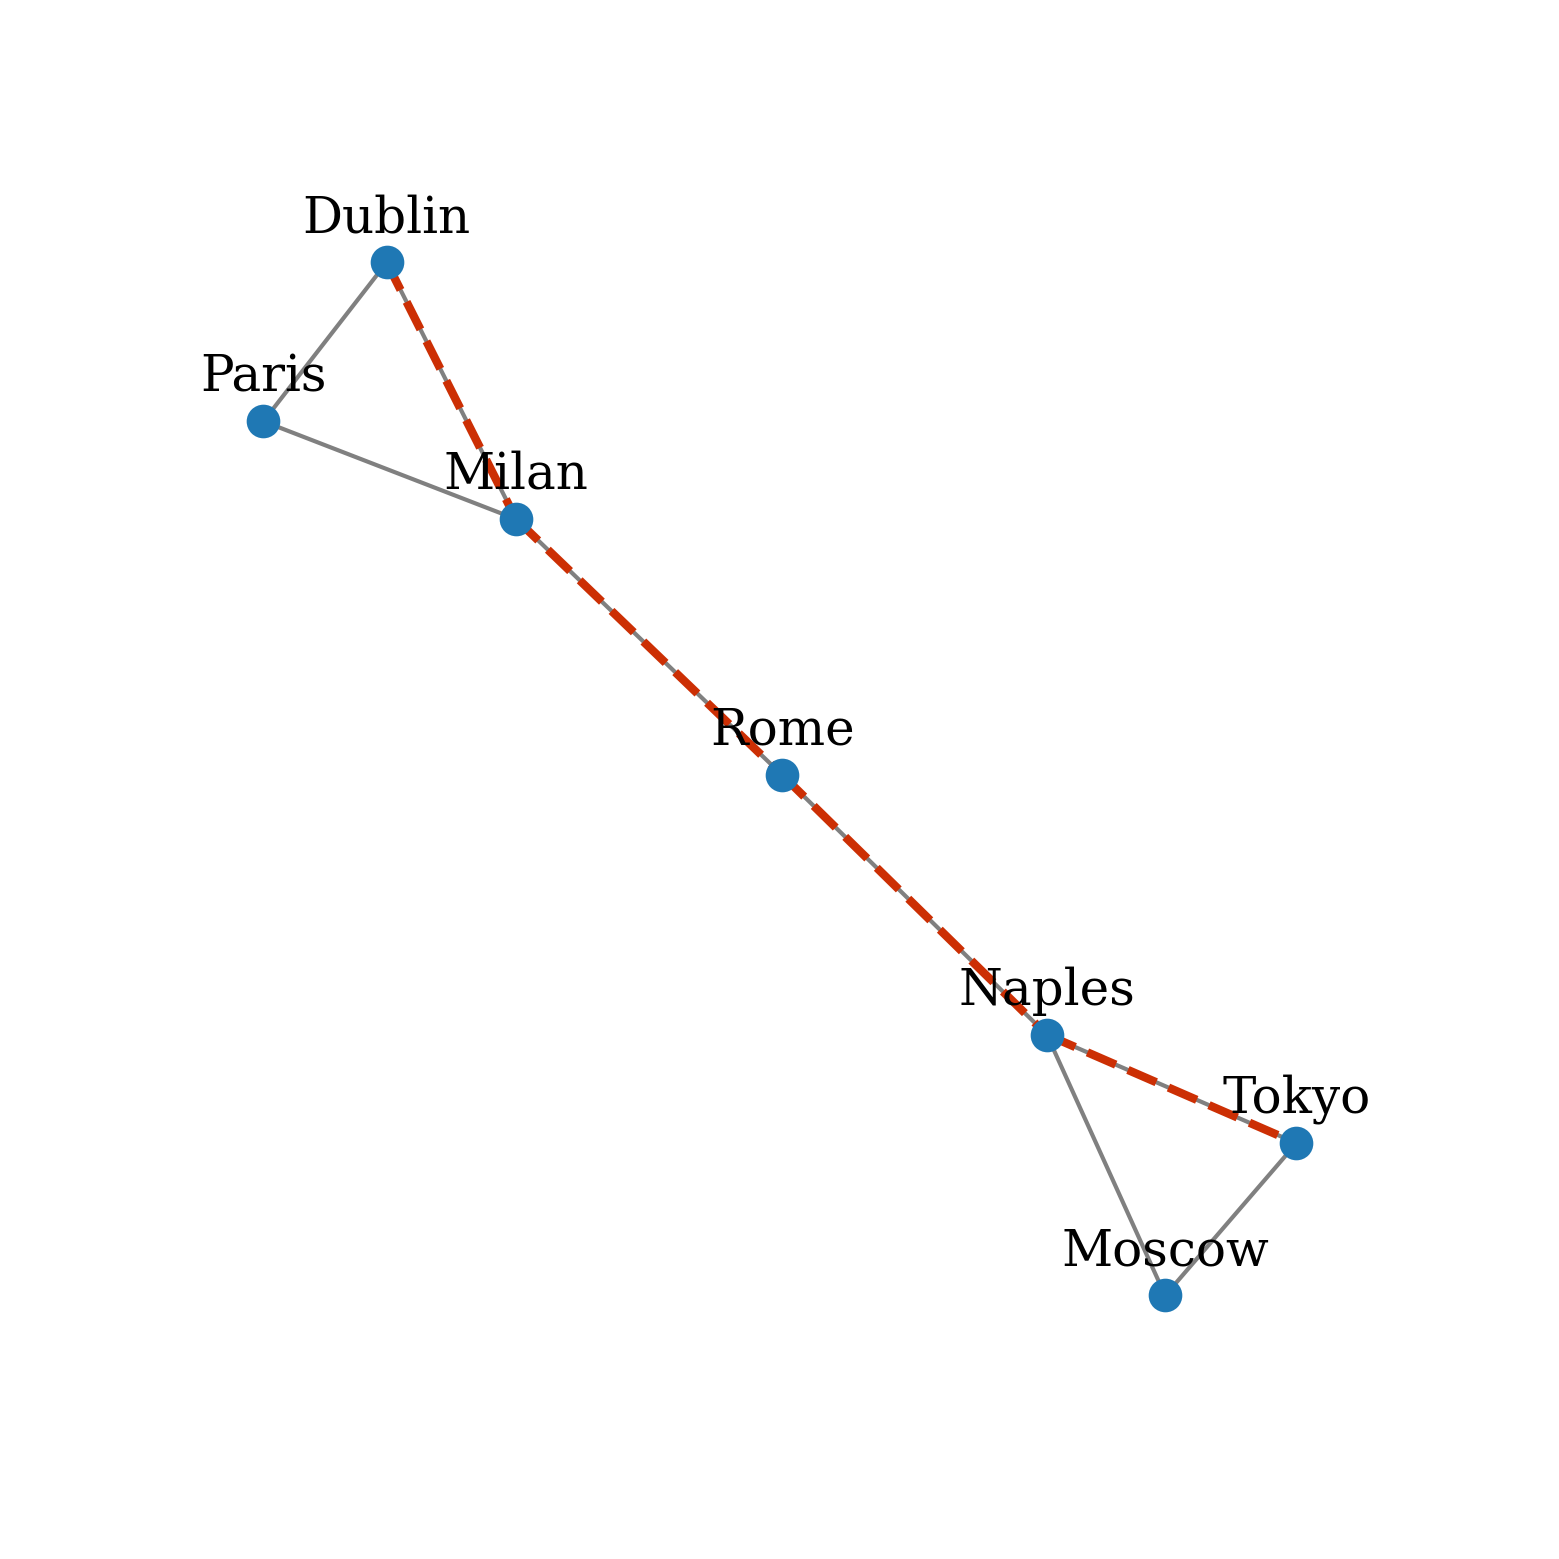

In [4]:
draw_enhanced_path(G, path, node_names=nodes,filename='shortest_path.png')

### Characteristic path lenght

In [5]:
nx.average_shortest_path_length(G)

2.1904761904761907

### Efficiency

In [6]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

print(nx.global_efficiency(G))
print(nx.local_efficiency(G))

0.611111111111111
0.6666666666666667


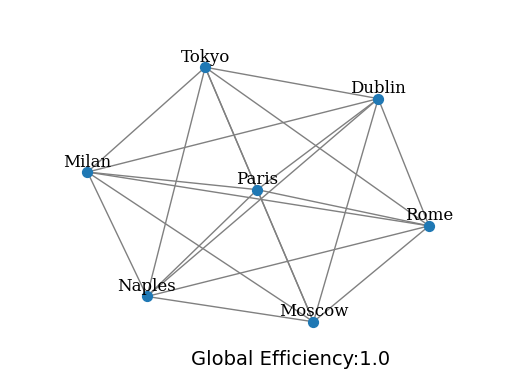

In [7]:
# higher efficiency
G = nx.complete_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(G,node_names=nodes,filename='efficiency.png')

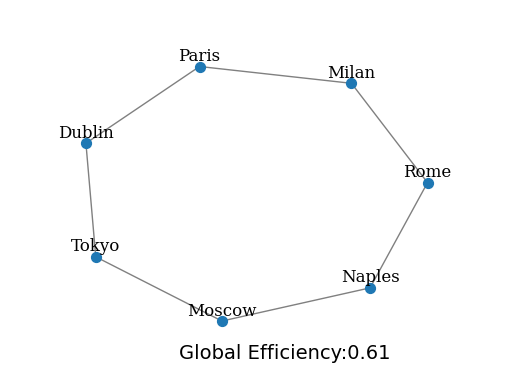

In [8]:
# lower efficiency
G = nx.cycle_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodes,filename='less_efficiency.png')

### Clustering coefficient

In [9]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [10]:
nx.average_clustering(G)

0.6666666666666667

In [11]:
nx.clustering(G)

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

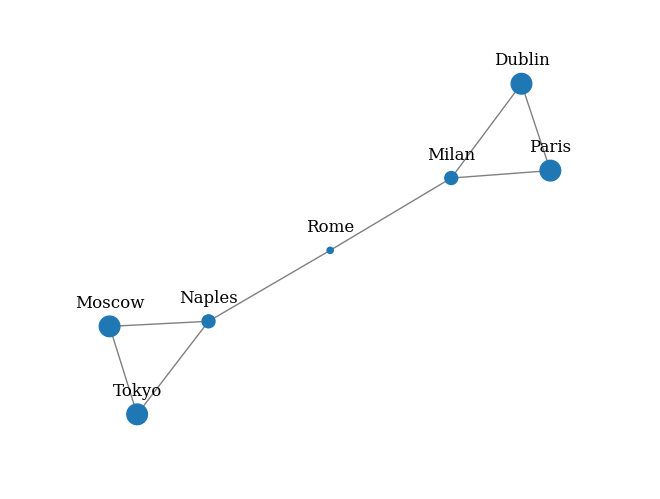

In [12]:
cc = nx.clustering(G)
node_size=[(v + 0.1) * 200 for v in cc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clustering.png')

### Centrality

In [13]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [14]:
nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Degree centrality,0.333333,0.333333,0.5,0.333333,0.5,0.333333,0.333333


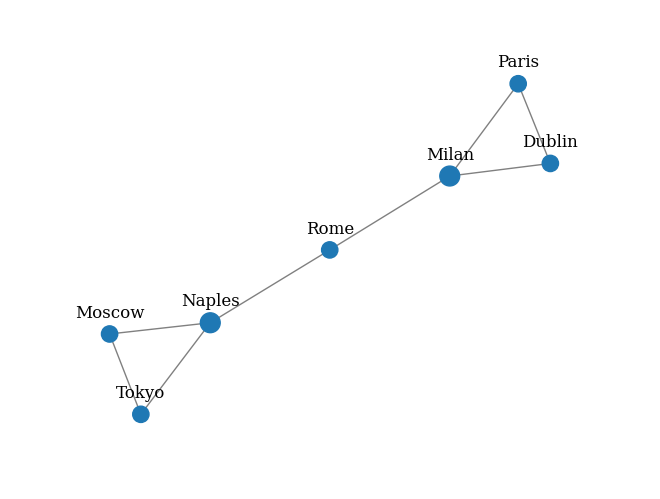

In [15]:
dc = nx.degree_centrality(G)
node_size=[(v + 0.01) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodes.values()
df

In [16]:
nx.closeness_centrality(G)

{1: 0.4,
 2: 0.4,
 3: 0.5454545454545454,
 4: 0.6,
 5: 0.5454545454545454,
 6: 0.4,
 7: 0.4}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Closeness centrality,0.4,0.4,0.545455,0.6,0.545455,0.4,0.4


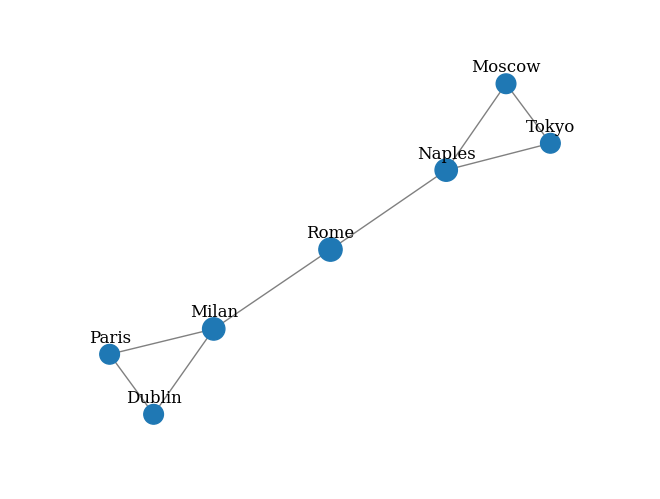

In [17]:
dc = nx.closeness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clos_centr.png')

df = pd.DataFrame(dc,index=['Closeness centrality'])
df.columns = nodes.values()
df

In [18]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.0,
 3: 0.5333333333333333,
 4: 0.6,
 5: 0.5333333333333333,
 6: 0.0,
 7: 0.0}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Betweenness centrality,0.0,0.0,0.533333,0.6,0.533333,0.0,0.0


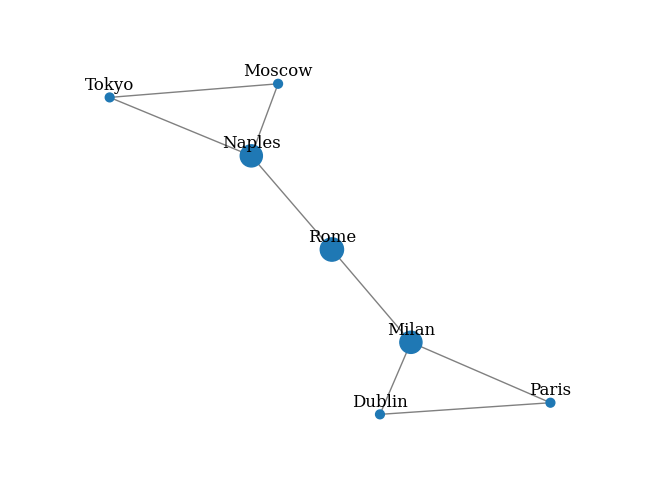

In [19]:
dc = nx.betweenness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='bet_centrality.png')

df = pd.DataFrame(dc,index=['Betweenness centrality'])
df.columns = nodes.values()
df

### Assortativity

In [20]:
nx.degree_pearson_correlation_coefficient(G)

-0.6

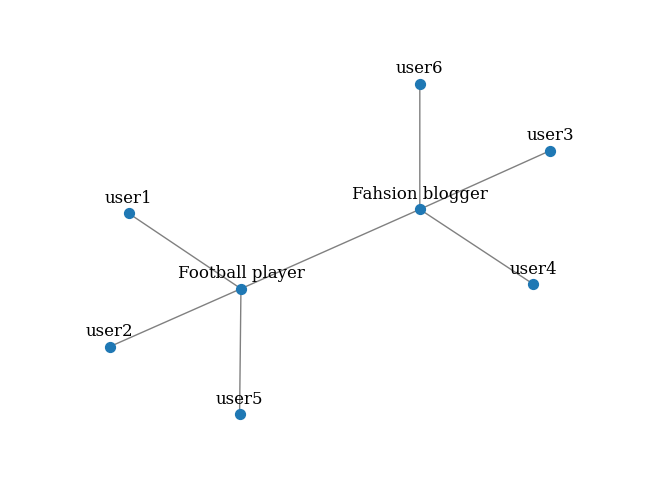

In [21]:
G = nx.Graph()
nodes = {1:'user1', 2:'user2', 3:'Football player', 4:'Fahsion blogger', 5:'user3', 6:'user4',
         7:'user5', 8:'user6'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,3),(2,3),(7,3),(3,4),(5,4),(6,4),(8,4)])

draw_graph(G, node_names=nodes,filename='assortativity.png')

In [22]:
nx.degree_pearson_correlation_coefficient(G)

-0.7500000000000001

### Modularity

In [23]:
import networkx.algorithms.community as nx_comm

G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

# partitions can be provided manually
print(nx_comm.modularity(G, communities=[{1,2,3,4},{5,6,7}]))

# or automatically computed using networkx
print(nx_comm.modularity(G, nx_comm.label_propagation_communities(G)))

0.3671875
0.3671875


### Transitivity

In [24]:
nx.transitivity(G)

0.5454545454545454